In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\enoch\Downloads\adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.dtypes # the data types are accurate with each column

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
df.info() # general information about the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum() #checking for null values or empty columns/rows

## How many of each race are represented in this dataset?

In [14]:
race_count = df['race'].value_counts()
print(race_count)

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


C:\Users\enoch\AppData\Local\Temp\ipykernel_14564\1580038187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_count.index, y=race_count.values, hue=None, palette='viridis', legend=None)


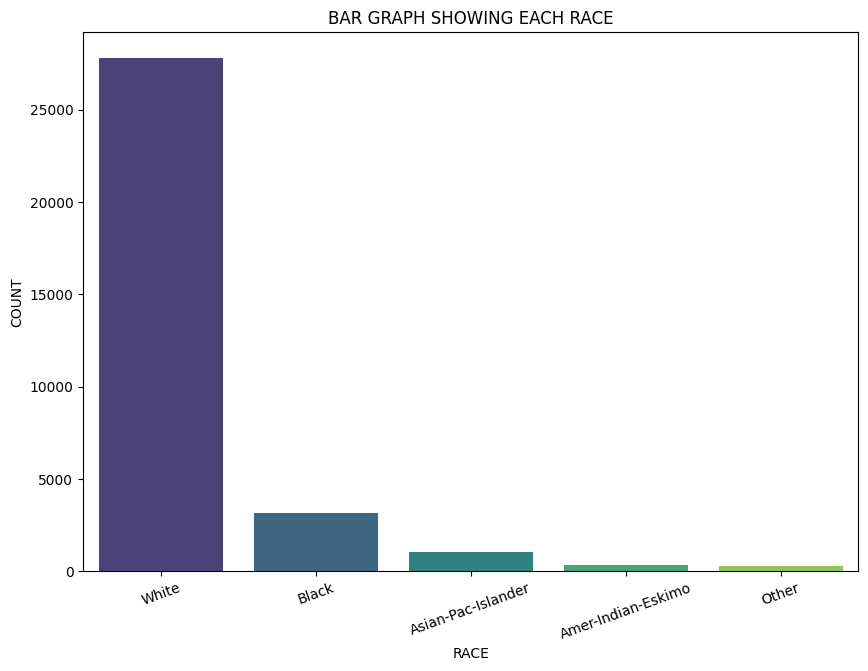

In [26]:
# Plot each race on a bar graph
plt.figure(figsize=(10,7))
sns.barplot(x=race_count.index, y=race_count.values, hue=None, palette='viridis', legend=None)
plt.ylabel('COUNT')
plt.xlabel('RACE')
plt.title('BAR GRAPH SHOWING EACH RACE')
plt.xticks(rotation=20) # rotates the x labels to make it easy to read
plt.show()

#### *Thus, we can conclude that;*

* *White*                = 27816
* *Black*                 = 3124
* *Asian-Pac-Islander*     =1039
* *Amer-Indian-Eskimo*      =311
* *Other*                   =271

## What is the average age of men?

In [34]:
average_age_men = df[df['sex'] == 'Male']['age'].mean()
print(average_age_men)

39.43354749885268


* *Thus, the Average age of men is 39 years* 

## What is the percentage of people who have a Bachelor's degree?

In [40]:
percentage_bachelors = (df['education'] == 'Bachelors').mean() * 100
percentage_bachelors

16.44605509658794

* *Thus, 16.45% of the people have a bachelor's degree*

### What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
### What percentage of people without advanced education make more than 50K?

In [50]:
 # with and without Bachelors, Masters, or Doctorate
higher_education = (df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')
lower_education = ~higher_education

 # percentage with salary >50K
higher_education_rich = (df[higher_education]['salary'] == '>50K').mean() * 100
lower_education_rich = (df[lower_education]['salary'] == '>50K').mean() * 100

print(higher_education_rich)
print(lower_education_rich)

46.535843011613935
17.3713601914639


* *46.54% of people with advance education make more than 50k*
* *17.37% of people without advanced education make more than 50k*

## What is the minimum number of hours a person works per week (hours-per-week feature)?

In [53]:
min_work_hours = df['hours-per-week'].min()
print(min_work_hours)

1


* *Thus, the minimum number of hours a person works per week is 1hour* 

### What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [55]:
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage = (num_min_workers['salary'] == '>50K').mean() * 100

print(rich_percentage)

10.0


* *Thus, 10% of the people who work the minimun number of hours per week have a salary of more than 50K* 

### What country has the highest percentage of people that earn >50K?

In [57]:
highest_earning_country = df[df['salary'] == '>50K']['native-country'].mode()[0]
highest_earning_country_percentage = (df[(df['salary'] == '>50K') & (df['native-country'] == highest_earning_country)].shape[0] / df.shape[0]) * 100

print(highest_earning_country)
print(highest_earning_country_percentage)

United-States
22.023279383311323


* *Thus, United States has the highest percentage of people that earn more than 50K with 22.o2%*

### Identify the most popular occupation for those who earn >50K in India.

In [58]:
top_IN_occupation = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]['occupation'].mode()[0]
print(top_IN_occupation)

Prof-specialty


* *Thus, Prof-specialty is the most popular occupation for those who earn more than 50K in India*